In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from pyextremes import get_extremes, get_return_periods
%matplotlib inline  
from pyextremes.eva import EVA


In [2]:
data = (
    pd
    .read_csv("csv_files/modified_windspeed.csv", index_col=0, parse_dates=True)
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)
data.head()
wind_speed=data["windspeed"]

 

In [3]:
# Create an EVA object
model = EVA(wind_speed)

In [4]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                     windspeed      Size:                             376,944
Start:                       January 1980      End:                         January 2023
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

In [5]:
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="raise",
    #threshold="2",
)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                     windspeed      Size:                             376,944
Start:                       January 1980      End:                         January 2023
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 44      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='datetime', ylabel='windspeed'>)

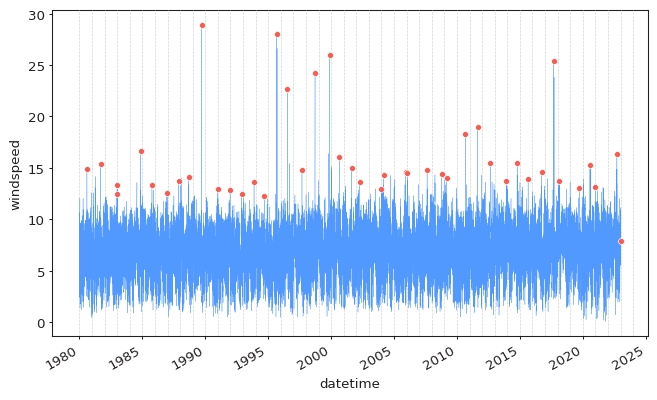

In [6]:
model.plot_extremes()

In [7]:
model.fit_model()
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                     windspeed      Size:                             376,944
Start:                       January 1980      End:                         January 2023
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 44      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='windspeed'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='windspeed', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

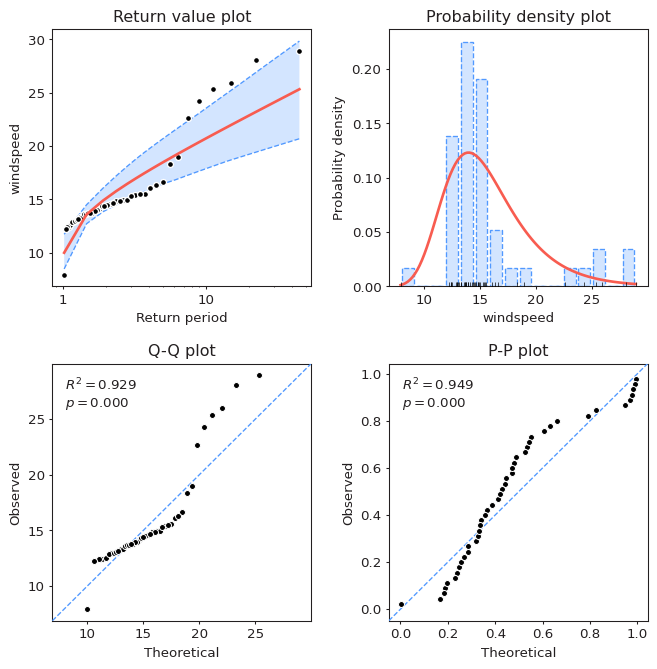

In [8]:
model.plot_diagnostic(alpha=0.95)
 

(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='Return period', ylabel='windspeed'>)

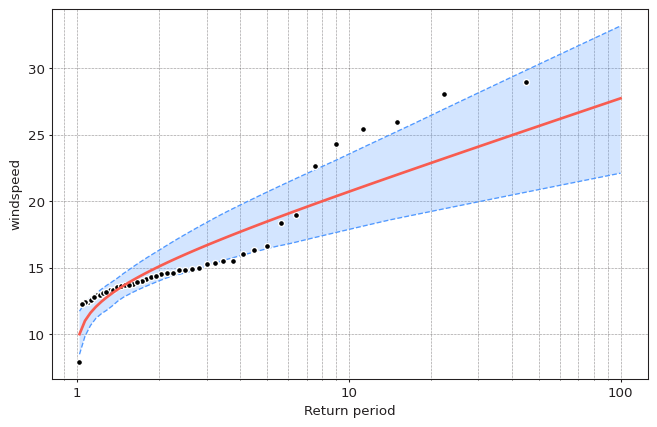

In [9]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

In [10]:
summary = model.get_summary(
    return_period=[2, 5, 10, 20, 50, 100],
    alpha=0.95,
    n_samples=1000,
)
summary

,return value,lower ci,upper ci
return period,,,
2.0,15.085714,14.143402,16.115590
5.0,18.470927,16.254088,20.404626
10.0,20.712232,17.413581,23.362609
20.0,22.862146,18.525812,26.218939
50.0,25.644989,19.966206,29.852517
100.0,27.730339,21.045579,32.567357


In [11]:
import math
return_periods_of_interest = np.array([1.0, 2, 5, 10, 50, 100])

for i, R in enumerate(return_periods_of_interest): 
    print(R)
    wht=3.41 + 2.04*math.log(R)
    print(wht)

1.0
3.41
2.0
4.824020248342288
5.0
6.693253341365565
10.0
8.107273589707855
50.0
11.390526931073417
100.0
12.804547179415708
